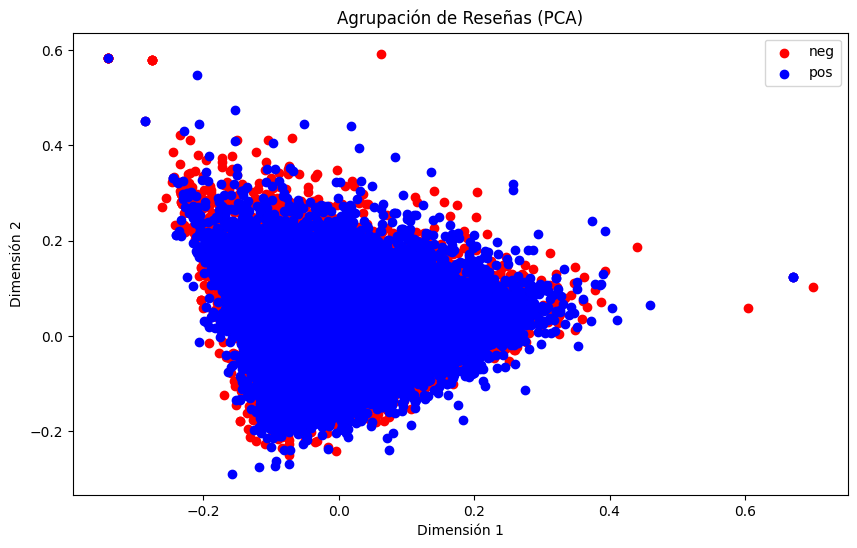

Precisión del modelo: 0.5268077873918418


In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA # Importar PCA
import matplotlib.pyplot as plt

# Cargar el conjunto de datos (igual que en el ejemplo anterior)
data = pd.read_csv("movie_review.csv")
X = data['text']
y = data['tag']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Entrenar un modelo de clasificación (usar K-Nearest Neighbors en lugar de Naive Bayes)
k = 5 # Número de vecinos cercanos a considerar (puedes ajustarlo según tus necesidades)
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)

# Reducción de dimensionalidad con PCA (para visualización)
pca = PCA(n_components=2) # Reducir a solo 2 dimensiones para la visualización
X_train_pca = pca.fit_transform(X_train.toarray())

# Visualización de la agrupación en un gráfico de dispersión
plt.figure(figsize=(10, 6))
colors = {'pos': 'b', 'neg': 'r'}  # Asigna los colores según tus etiquetas
for label in np.unique(y_train):
    indices = np.where(y_train == label)
    plt.scatter(X_train_pca[indices[0], 0], X_train_pca[indices[0], 1], c=colors[label], label=label)

plt.title('Agrupación de Reseñas (PCA)')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend()
plt.show()

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Mejoras al código
1. Preprocesamiento de texto en las reseñas
2. Modificación de parámetros en TF-IDF
3. Elección del mejor valor de k

In [2]:
# 1. Preprocesamiento de texto
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenizar el texto
    tokens = word_tokenize(text)
    # Eliminar stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lematizar palabras
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Realizar stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Unir tokens nuevamente en texto
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chj06\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chj06\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chj06\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Aplicar preprocesamiento de texto a todas las reseñas
for i in range(data['text'].shape[0]):
  data.loc[i, 'preprocessed_text'] = preprocess_text(data.loc[i, 'text'])

In [4]:
# Separar los datos en características (X) y etiquetas (y)
X = data['preprocessed_text']
y = data['tag']
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(max_features=1000, min_df=3)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
# Entrenar un modelo de clasificación (usar K-Nearest Neighbors en lugar de Naive Bayes)
k = 3 # Número de vecinos cercanos a considerar (puedes ajustarlo según tus necesidades)
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)
# Paso 7: Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Precisión del modelo: {accuracy}")
print("Informe de clasificación:")
print(report)

Precisión del modelo: 0.5471260815822002
Informe de clasificación:
              precision    recall  f1-score   support

         neg       0.55      0.42      0.48      6371
         pos       0.54      0.67      0.60      6573

    accuracy                           0.55     12944
   macro avg       0.55      0.55      0.54     12944
weighted avg       0.55      0.55      0.54     12944



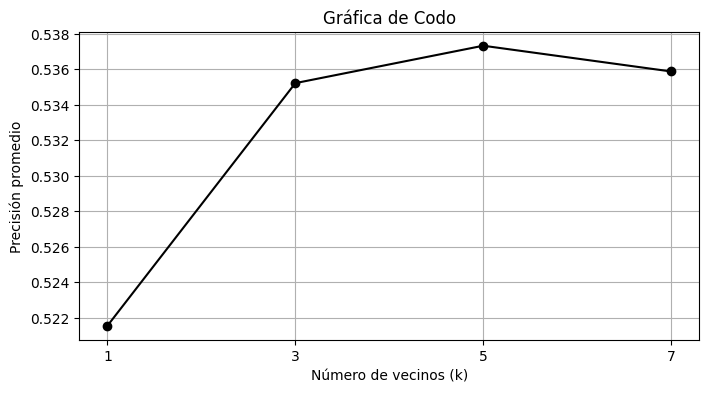

In [5]:
# 3. Eleccion del mejor valor de k
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

k_values = [1, 3, 5, 7]
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.figure(figsize=(8, 4))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', c='Black')
plt.title('Gráfica de Codo')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Precisión promedio')
plt.xticks(k_values)
plt.grid(True)
plt.show()